In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import math
import seaborn as sns
from datetime import datetime as dt
import pandas_profiling as pdp
%precision 3
pd.options.display.precision = 2
%matplotlib inline
sns.set()


In [9]:
import pyodbc

# PCに入っているODBCドライバー一覧
print(pyodbc.drivers())

conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)}; ' +
    r'DBQ=\Users\a0841\OneDrive\Data\CMAdatabase.accdb;'
)

conn = pyodbc.connect(conn_str)
 
print('List of tables')
cur= conn.cursor()
for table_info in cur.tables(tableType='TABLE'):
    print(table_info.table_name)

['SQL Server', 'ODBC Driver 17 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)']
List of tables
Changes in District
CMA_NIX_2014q4_2019q2
CMA_NIX_2014q4_2019q4
CMA_NIX_2019q3_2019q4
CMA_NIX_2020q1_
CMA_NIX_2020q1_2021q1
List of Financial Institutions


In [10]:
   # Read table    
df = pd.io.sql.read_sql(r'select * from CMA_NIX_2014q4_2019q4', conn)
#df2 = pd.io.sql.read_sql(r'select * from CMA_NIX_2020q1_2021q1', conn)

#df=df1.append(df2)


df['tq'] = pd.PeriodIndex(df['time'], freq='Q')
df = df[~(df['scale']=='Large')]

df['quarter']=df['time'].str.split('q', expand=True).loc[:,1]
df['year']=df['time'].str.split('q', expand=True).loc[:,0]
df['quarter']=df['quarter'].astype('float')
df['year']=df['year'].astype('float')

In [11]:
df_cond = (df['MFI_id']==203) | (df['MFI_id']==205) | (df['MFI_id']==218) | (df['MFI_id']==233) | (df['MFI_id']==212) | (df['MFI_id']==231) | (df['MFI_id']==224)

df['FI_type']=0
df.loc[df_cond,'FI_type'] = 1
df.loc[ (df['MFI_id']==1) | (df['MFI_id']==228),'FI_type'] = 2


df['MDI_dummy']=0
df.loc[df_cond,'MDI_dummy'] = 1

df = df[~(df['FI_type']==2)]

In [12]:
df3=df.loc[df['quarter']==4]

In [13]:
vill2019_1 = pd.read_stata("C:\\Users\\a0841\\OneDrive\\Data\\Commune Database\\CDB2019_vill(1).dta")
vill2019_2 = pd.read_stata("C:\\Users\\a0841\\OneDrive\\Data\\Commune Database\\CDB2019_vill(2).dta")
comm2019 = pd.read_stata("C:\\Users\\a0841\\OneDrive\\Data\\Commune Database\\CDB2019_com(1).dta")


vill2019 = pd.merge(vill2019_1, vill2019_2, on ='VillGis')

vill2019['DistGis'] = vill2019['VillGis']/10000 
vill2019['DistGis'] = np.round(vill2019['DistGis'])

comm2019['DistGis']=comm2019['CommGis']/100
comm2019['DistGis'] = np.round(comm2019['DistGis'])



vill2019['child_pop'] = vill2019['v201'] + vill2019['v202'] + vill2019['v203'] +vill2019['v204'] +vill2019['v205'] +vill2019['v206'] +vill2019['v207'] +vill2019['v208'] +vill2019['v209'] +vill2019['v210'] +vill2019['v211'] +vill2019['v213']+vill2019['v214']
vill2019['adult_pop']=vill2019['v2'] + vill2019['v3'] -vill2019['child_pop']
CD2019_1 = vill2019.groupby(by='DistGis').sum()

CD2019_2 = comm2019.groupby(by='DistGis').sum()

CD2019=pd.merge(CD2019_1, CD2019_2, right_on='DistGis', left_on='DistGis')

CD2019 = CD2019[['v1','v2','v3','adult_pop','child_pop','v2007']]
CD2019['year'] = 2019



In [14]:
vill2018 = pd.read_stata("C:\\Users\\a0841\\OneDrive\\Data\\Commune Database\\CDB2018_vill(1).dta")
comm2018 = pd.read_stata("C:\\Users\\a0841\\OneDrive\\Data\\Commune Database\\CDB2018_com(1).dta")


vill2018['VillGis'] = vill2018['VillGis'].astype('float')

vill2018['DistGis'] = vill2018['VillGis']/10000 
vill2018['DistGis'] = np.round(vill2018['DistGis'])


#vill2018['child_pop'] = vill2018['v201'] + vill2018['v202'] + vill2018['v203'] +vill2018['v204'] +vill2018['v205'] +vill2018['v206'] +vill2018['v207'] +vill2018['v208'] +vill2018['v209'] +vill2018['v210'] +vill2018['v211'] +vill2018['v213']+vill2018['v214']
#vill2018['adult_pop']=vill2018['v2'] + vill2018['v3'] -vill2018['child_pop']
CD2018_1 = vill2018.groupby(by='DistGis').sum()

CD2018=pd.merge(CD2018_1, CD2019_2, right_on='DistGis', left_on='DistGis')

CD2018 = CD2018[['v1','v2','v3','v2007']]
CD2018['year'] = 2018

In [15]:
for k in range(2014, 2018):
    globals()['vill' + str(k) + '_1'] = pd.read_stata("C:\\Users\\a0841\\OneDrive\\Data\\Commune Database\\CDB" + str(k) + "_vill(1).dta")
    globals()['vill' + str(k) + '_2'] = pd.read_stata("C:\\Users\\a0841\\OneDrive\\Data\\Commune Database\\CDB" + str(k) + "_vill(2).dta")
    globals()['comm' + str(k) ] = pd.read_stata("C:\\Users\\a0841\\OneDrive\\Data\\Commune Database\\CDB" + str(k) + "_com(1).dta")


    globals()['vill' + str(k)] = pd.merge(globals()['vill' + str(k) + '_1'], globals()['vill' + str(k) + '_2'] , left_on ='VillGis',right_on='VillGis')

    globals()['vill' + str(k)]['DistGis'] = globals()['vill' + str(k)]['VillGis']/10000 
    globals()['vill' + str(k)]['DistGis'] = np.round(globals()['vill' + str(k)]['DistGis'])

    
    globals()['comm' + str(k)]['DistGis']=globals()['comm' + str(k)]['CommGis']/100
    globals()['comm' + str(k)]['DistGis'] = np.round(globals()['comm' + str(k)]['DistGis'])

    globals()['vill' + str(k)]['child_pop'] = globals()['vill' + str(k)]['v201'] + globals()['vill' + str(k)]['v202'] + globals()['vill' + str(k)]['v203'] +globals()['vill' + str(k)]['v204'] +globals()['vill' + str(k)]['v205'] +globals()['vill' + str(k)]['v206'] +globals()['vill' + str(k)]['v207'] +globals()['vill' + str(k)]['v208'] +globals()['vill' + str(k)]['v209'] +globals()['vill' + str(k)]['v210'] +globals()['vill' + str(k)]['v211'] +globals()['vill' + str(k)]['v213']+globals()['vill' + str(k)]['v214']
    globals()['vill' + str(k)]['adult_pop']=globals()['vill' + str(k)]['v2'] + globals()['vill' + str(k)]['v3'] -globals()['vill' + str(k)]['child_pop']
    globals()['CD' + str(k) + '_1'] = globals()['vill' + str(k)].groupby(by='DistGis').sum()

    globals()['CD' + str(k) + '_2'] = globals()['comm' + str(k)].groupby(by='DistGis').sum()

    globals()['CD' + str(k)]=pd.merge(globals()['CD' + str(k) + '_1'], globals()['CD' + str(k) + '_2'], right_on='DistGis', left_on='DistGis')

    globals()['CD' + str(k) ] = globals()['CD' + str(k) ][['v1','v2','v3','adult_pop','child_pop', 'v2007']]
    globals()['CD' + str(k) ]['year']=k


In [16]:
CD=CD2014
for k in range(2015,2020):
    CD =CD.append(globals()['CD' + str(k) ])


CD=CD.reset_index()

In [17]:
CD['Pop_density'] = (CD['v2'] + CD['v3']) / (CD['v2007'])/10000

In [18]:
CD.describe()

,DistGis,v1,v2,v3,adult_pop,child_pop,v2007,year,Pop_density
count,1194.00,1194.00,1194.00,1194.00,991.00,991.00,1.19e+03,1194.00,1.19e+03
mean,1171.29,17421.06,40420.66,38920.64,52224.93,27213.52,2.90e+05,2016.52,5.52e-04
std,689.22,10524.29,25490.58,23848.54,33655.16,16326.56,1.81e+06,1.71,2.46e-03
min,102.00,707.00,1350.00,1473.00,2180.00,939.00,2.06e+02,2014.00,7.08e-08
25%,601.00,8804.25,20472.50,20013.75,26192.00,14163.50,3.02e+04,2015.00,4.38e-05
50%,1206.00,15149.50,34799.50,33911.50,44212.00,23620.00,5.62e+04,2017.00,1.29e-04
75%,1707.00,25212.25,58766.25,56787.00,75863.00,38436.50,1.29e+05,2018.00,3.09e-04
max,2507.00,53574.00,163908.00,130066.00,221424.00,83861.00,4.00e+07,2019.00,3.44e-02


## Event years


In [19]:
MA = pd.read_excel('M&A\\Data\\MFI History_as of 20210511.xlsx')

MA= MA[['ID','Year of M&A']]
MA = MA.rename(columns={'Year of M&A': 'MA_Year'})

MA['MA_Year'].value_counts()

2016.0    7
2018.0    6
2017.0    6
2015.0    2
2019.0    2
2012.0    1
2014.0    1
Name: MA_Year, dtype: int64

In [20]:
df4 = pd.merge(df3, CD, left_on=('district_code','year'), right_on=('DistGis', 'year') )

df4 = pd.merge(df4,MA, left_on='MFI_id', right_on='ID')

In [21]:
vill2019_1 = pd.read_stata("C:\\Users\\a0841\\OneDrive\\Data\\Commune Database\\CDB2019_vill(1).dta")
vill2019_2 = pd.read_stata("C:\\Users\\a0841\\OneDrive\\Data\\Commune Database\\CDB2019_vill(2).dta")
comm2019 = pd.read_stata("C:\\Users\\a0841\\OneDrive\\Data\\Commune Database\\CDB2019_com(1).dta")


vill2019 = pd.merge(vill2019_1, vill2019_2, on ='VillGis')

vill2019['DistGis'] = vill2019['VillGis']/10000 
vill2019['DistGis'] = np.round(vill2019['DistGis'])

comm2019['DistGis']=comm2019['CommGis']/100
comm2019['DistGis'] = np.round(comm2019['DistGis'])



vill2019['child_pop'] = vill2019['v201'] + vill2019['v202'] + vill2019['v203'] +vill2019['v204'] +vill2019['v205'] +vill2019['v206'] +vill2019['v207'] +vill2019['v208'] +vill2019['v209'] +vill2019['v210'] +vill2019['v211'] +vill2019['v213']+vill2019['v214']
vill2019['adult_pop']=vill2019['v2'] + vill2019['v3'] -vill2019['child_pop']
CD2019_1 = vill2019.groupby(by='DistGis').sum()

CD2019_2 = comm2019.groupby(by='DistGis').sum()

CD2019=pd.merge(CD2019_1, CD2019_2, right_on='DistGis', left_on='DistGis')

CD2019 = CD2019[['v1','v2','v3','adult_pop','child_pop','v2007']]
CD2019['year'] = 2019



In [22]:
df4['event'] = df4['year'] - df4['MA_Year']

df4['event'].loc[(df4['event']>3) ] = 3
df4['event'].loc[(df4['event']<-3) ] = -3

df4['event'].value_counts()


df4['event']=df4['event'].replace(np.nan,0)


C:\Users\a0841\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
for k in range(2014,2020):
    list = ['amount_loan', 'total_num_borrowers', 'num_female_loan','par_30']
    for name in list:
        q1 = df4[name].loc[(df4['year']==k)].quantile(0.01)
        q2 = df4[name].quantile(0.99)
        df4[name].loc[(df4[name]<q1) & (df4['year']==k)]=np.nan
        df4[name].loc[(df4[name]>q2) & (df4['year']==k)]=np.nan


In [24]:
df4['amount_loan'] = df4['amount_loan']/4000*1000000   # Millions KHR ==> USD 
df4['par_30'] = df4['par_30']/4000*1000000

df4['district_code']= df4['district_code'].astype('float')

df4['ratio_staff_female_male']=df4['num_staff_female']/df4['num_staff_male']
df4['ratio_staff_female_male']=df4['ratio_staff_female_male'].replace([np.inf, -np.inf], np.nan)

df4['log_ratio_staff_female_male']  = np.log(df4['ratio_staff_female_male']+1)
df4['log_ratio_staff_female_male']=df4['log_ratio_staff_female_male'].replace([np.inf, -np.inf], np.nan)

df4['num_office']=df4['num_office'].replace(['I'],1)
df4['num_office']=pd.to_numeric(df4["num_office"], errors="coerce")

df4['log_amount_loan']=np.log(df4['amount_loan'])
df4['log_amount_loan']=df4['log_amount_loan'].replace([np.inf, -np.inf], np.nan)

df4['log_borrower']=np.log(df4['total_num_borrowers'])
df4['log_borrower']=df4['log_borrower'].replace([np.inf, -np.inf], np.nan)



df4['ratio_par30']=df4['par_30']/df4['amount_loan']
df4['ratio_par30']=df4['ratio_par30'].replace([np.inf, -np.inf], np.nan)
df4['log_par_30']=np.log(df4['ratio_par30'])
df4['log_par_30']=df4['log_par_30'].replace([np.inf, -np.inf], np.nan)


df4['avg_loan_size']=df4['amount_loan']/df4['total_num_borrowers']
df4['log_avg_loan_size']=np.log(df4['avg_loan_size'])
df4['log_avg_loan_size']=df4['log_avg_loan_size'].replace([np.inf, -np.inf], np.nan)

df4['ratio_female_borr']=df4['num_female_loan']/df4['total_num_borrowers']
df4['ratio_female_borr']=df4['ratio_female_borr'].replace([np.inf, -np.inf], np.nan)


df4['productivity']=np.log(df4['total_num_borrowers']/(df4['num_staff_male']+df4['num_staff_female']))

df4['productivity']=df4['productivity'].replace([np.inf, -np.inf], np.nan)

df4['productivity']=df4['productivity'].replace([np.inf, -np.inf], np.nan)

df4['log_ratio_female_borr']=np.log(df4['ratio_female_borr']+1)
df4['log_ratio_female_borr']=df4['log_ratio_female_borr'].replace([np.inf, -np.inf], np.nan)

C:\Users\a0841\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
df4['dist_time_effect']=df4['district_code']*100000 + df4['year']*10 + df4['quarter']

# Regression Analysis (Event Study)

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as sms
from patsy import dmatrices

from statsmodels.iolib.summary2 import summary_col

In [28]:
df4[['log_amount_loan','event','district_code','time','MFI_id']].describe()

,log_amount_loan,event,district_code,MFI_id
count,20718.00,68945.00,68945.00,68945.00
mean,11.75,-0.09,1169.08,247.08
std,2.56,1.12,690.63,36.10
min,-28.01,-3.00,102.00,201.00
25%,10.15,0.00,601.00,221.00
50%,12.05,0.00,1205.00,242.00
75%,13.75,0.00,1707.00,264.00
max,16.31,3.00,2507.00,405.00


In [29]:

dat =  df4[['log_amount_loan','event','dist_time_effect','district_code','MFI_id']].dropna()


cluster_ols1 = sms.ols(formula='log_amount_loan ~ C(event) + C(MFI_id) + C(dist_time_effect) -1' , data=dat).fit(cov_type='cluster',
                                                        cov_kwds={'groups': dat['district_code']},
                                                        use_t=True)

                                                        
dep_stat1 = dat.describe()


In [30]:


dat =  df4[['log_borrower','event','district_code','dist_time_effect','MFI_id']].dropna()


dat.describe()

cluster_ols2 = sms.ols(formula='log_borrower ~ C(event) + C(MFI_id) + C(dist_time_effect) -1' , data=dat).fit(cov_type='cluster',
                                                        cov_kwds={'groups': dat['district_code']},
                                                        use_t=True)
                                                        
dep_stat2 = dat.describe()


In [31]:
dat =  df4[['log_avg_loan_size','event','district_code','dist_time_effect','MFI_id']].dropna()


dat.describe()

cluster_ols3 = sms.ols(formula='log_avg_loan_size ~ C(event) + C(MFI_id) + C(dist_time_effect) -1' , data=dat).fit(cov_type='cluster',
                                                        cov_kwds={'groups': dat['district_code']},
                                                        use_t=True)
                                                        
dep_stat3 = dat.describe()


In [32]:

dat =  df4[['ratio_female_borr','event','district_code','dist_time_effect','MFI_id']].dropna()


dat.describe()

cluster_ols4 = sms.ols(formula='ratio_female_borr ~ C(event) + C(MFI_id) + C(dist_time_effect) -1' , data=dat).fit(cov_type='cluster',
                                                        cov_kwds={'groups': dat['district_code']},
                                                        use_t=True)
                                                        
dep_stat4 = dat.describe()


In [33]:


dat =  df4[['ratio_par30','event','district_code','dist_time_effect','MFI_id']].dropna()


dat.describe()

cluster_ols5 = sms.ols(formula='ratio_par30 ~ C(event) + C(MFI_id) + C(dist_time_effect) -1' , data=dat).fit(cov_type='cluster',
                                                        cov_kwds={'groups': dat['district_code']},
                                                        use_t=True)
                                                        
dat.describe()



,ratio_par30,event,district_code,dist_time_effect,MFI_id
count,1.64e+04,16409.00,16409.00,1.64e+04,16409.00
mean,7.02e-02,-0.21,1105.48,1.11e+08,232.51
std,6.46e-01,1.50,671.57,6.72e+07,27.96
min,0.00e+00,-3.00,102.00,1.02e+07,201.00
25%,0.00e+00,-1.00,506.00,5.06e+07,212.00
50%,3.19e-03,0.00,1202.00,1.20e+08,229.00
75%,2.20e-02,0.00,1606.00,1.61e+08,247.00
max,6.33e+01,3.00,2507.00,2.51e+08,405.00


In [34]:
dat =  df4[['productivity','event','district_code','dist_time_effect','MFI_id']].dropna()


dat.describe()

cluster_ols6 = sms.ols(formula='productivity ~ C(event) + C(MFI_id) + C(dist_time_effect) -1' , data=dat).fit(cov_type='cluster',
                                                        cov_kwds={'groups': dat['district_code']},
                                                        use_t=True)
                                                        
dat.describe()


,productivity,event,district_code,dist_time_effect,MFI_id
count,4855.00,4855.00,4855.00,4.86e+03,4855.00
mean,3.36,-0.55,1085.21,1.09e+08,231.18
std,1.63,1.61,680.74,6.81e+07,28.01
min,-3.40,-3.00,102.00,1.02e+07,201.00
25%,2.54,-2.00,502.00,5.02e+07,212.00
50%,3.60,0.00,1105.00,1.11e+08,229.00
75%,4.55,0.00,1603.00,1.60e+08,234.00
max,7.01,3.00,2507.00,2.51e+08,405.00


<ipython-input-35-31387e417144>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  res.index=res.index.str.replace('event', '').str.replace('C', '').str.replace('(', '').str.replace(')', '').str.replace('[', '').str.replace(']', '')


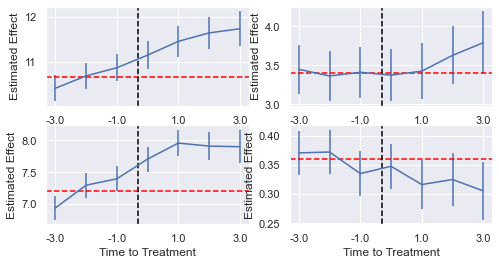

In [35]:
index=['-3', '-2', '-1','0','1', '2', '3']

fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
#ax5 = fig.add_subplot(2, 3, 5)
#ax6 = fig.add_subplot(2, 3, 6)

for k in range(1,5):
    res = pd.concat([globals()['cluster_ols'+str(k)].params, globals()['cluster_ols'+str(k)].bse], axis = 1)
    res = res.rename(columns={1: 'std_error', 0: 'Beta'})
    res['ci'] = res['std_error']*1.96
    res = res.filter(like='C(event)', axis=0)
    res.index=res.index.str.replace('event', '').str.replace('C', '').str.replace('(', '').str.replace(')', '').str.replace('[', '').str.replace(']', '')
    res.index.astype('float').astype('int')
    
    res.plot(
        y='Beta',
        yerr='ci',
        xlabel='Time to Treatment',
        ylabel='Estimated Effect',
        legend=False, ax= globals()['ax' + str(k)]
    )
    mean= res['Beta'].iloc[0:3].mean()
    globals()['ax' + str(k)].axhline(mean, linestyle='dashed',color='red')
    globals()['ax' + str(k)].axvline(2.7, linestyle='dashed',color='black')

plt.show()

In [53]:
regressor=['C(event)[-3.0]','C(event)[-2.0]','C(event)[-1.0]','C(event)[0.0]','C(event)[1.0]','C(event)[2.0]','C(event)[3.0]']
dfoutput = summary_col([cluster_ols1, cluster_ols2, cluster_ols3, cluster_ols4,cluster_ols5, cluster_ols6],info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},stars=True, float_format='%0.3f',drop_omitted =True, regressor_order=regressor)
print(dfoutput)


               log_amount_loan log_borrower log_avg_loan_size ratio_female_borr ratio_par30 productivity
--------------------------------------------------------------------------------------------------------
C(event)[-3.0] 10.410***       3.449***     6.939***          0.371***          0.096***    6.361***    
               (0.147)         (0.161)      (0.095)           (0.019)           (0.012)     (0.477)     
C(event)[-2.0] 10.685***       3.363***     7.295***          0.372***          0.064***    6.437***    
               (0.146)         (0.163)      (0.102)           (0.019)           (0.013)     (0.483)     
C(event)[-1.0] 10.867***       3.410***     7.396***          0.335***          0.053***    6.533***    
               (0.153)         (0.167)      (0.100)           (0.020)           (0.015)     (0.502)     
C(event)[0.0]  11.148***       3.374***     7.705***          0.348***          0.021       6.511***    
               (0.158)         (0.170)      (0.100)   

In [76]:
CD['Pop_density'].mean()

0.001

In [52]:
dep_stat4.iloc[:,1]

count    18823.00
mean        -0.19
std          1.42
min         -3.00
25%         -1.00
50%          0.00
75%          0.00
max          3.00
Name: event, dtype: float64

In [91]:
from tabulate import tabulate
table =  []

head= ['Variable','Unit of Observations', 'Observations', 'Mean', 'Std. dev.']
table=table+ [['Log. Loan Amount (Millions of USD)','MFI-District',dep_stat1.iloc[0,1],dep_stat1.iloc[1,1],dep_stat1.iloc[2,1]]]
table=table+ [['Log. Number of Borrowers','MFI-District',dep_stat2.iloc[0,1],dep_stat2.iloc[1,1],dep_stat2.iloc[2,1]]]
table=table+ [['Log. Loan Size per Borroer','MFI-District',dep_stat3.iloc[0,1],dep_stat3.iloc[1,1],dep_stat3.iloc[2,1]]]
table=table+ [['Ratio of Female Borrower to Total Borrowers','MFI-District',dep_stat4.iloc[0,1],dep_stat4.iloc[1,1],dep_stat4.iloc[2,1]]]
table=table+ [['Populatuin Density','District',CD['Pop_density'].count(),CD['Pop_density'].mean(),CD['Pop_density'].std()]]

CD['Pop_density'].mean()

tab = tabulate(table,headers= head , tablefmt='latex',floatfmt='8.3f')

f = open('M&A\Graph_Event_Study\descriptive_table.txt', 'w')
f.write(tab)

f.close()

In [ ]:
pd.get_dummies(df4['event'])

,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
68940,0,0,0,1,0,0,0
68941,0,0,0,1,0,0,0
68942,0,0,0,1,0,0,0
68943,0,0,0,1,0,0,0


In [ ]:
dummy=pd.get_dummies(df4['event'])

df4['A0'] = df4['Pop_density']*dummy[-3.0]
df4['A1'] = df4['Pop_density']*dummy[-2.0]
df4['A2'] = df4['Pop_density']*dummy[-1.0]
df4['A3'] = df4['Pop_density']*dummy[0.0]
df4['A4'] = df4['Pop_density']*dummy[1.0]
df4['A5'] = df4['Pop_density']*dummy[2.0]
df4['A6'] = df4['Pop_density']*dummy[3.0]


In [ ]:

dat =  df4[['log_amount_loan','event','dist_time_effect','district_code','MFI_id','A0','A1','A2','A3','A4','A5','A6' ]].dropna()
cluster_ols1 = sms.ols(formula='log_amount_loan ~ C(event) + A0 + A1 + A2 +A3 + A4 + A5 + A6 + C(MFI_id) + C(dist_time_effect) -1' , data=dat).fit(cov_type='cluster',
                                                        cov_kwds={'groups': dat['district_code']},
                                                        use_t=True)

                                                        
dat =  df4[['log_borrower','event','dist_time_effect','district_code','MFI_id','A0','A1','A2','A3','A4','A5','A6' ]].dropna()
cluster_ols2 = sms.ols(formula='log_borrower ~ C(event) + A0 + A1 + A2 +A3 + A4 + A5 + A6 + C(MFI_id) + C(dist_time_effect) -1' , data=dat).fit(cov_type='cluster',
                                                        cov_kwds={'groups': dat['district_code']},
                                                        use_t=True)
                                                        
                                                        
dat =  df4[['log_avg_loan_size','event','dist_time_effect','district_code','MFI_id','A0','A1','A2','A3','A4','A5','A6' ]].dropna()
cluster_ols3 = sms.ols(formula='log_avg_loan_size ~ C(event) + A0 + A1 + A2 +A3 + A4 + A5 + A6 + C(MFI_id) + C(dist_time_effect) -1' , data=dat).fit(cov_type='cluster',
                                                        cov_kwds={'groups': dat['district_code']},
                                                        use_t=True)


dat =  df4[['ratio_female_borr','event','dist_time_effect','district_code','MFI_id','A0','A1','A2','A3','A4','A5','A6' ]].dropna()
cluster_ols4 = sms.ols(formula='ratio_female_borr ~ C(event) + A0 + A1 + A2 +A3 + A4 + A5 + A6 + C(MFI_id) + C(dist_time_effect) -1' , data=dat).fit(cov_type='cluster',
                                                        cov_kwds={'groups': dat['district_code']},
                                                        use_t=True)

In [ ]:
regressor=['C(event)[-3.0]','C(event)[-2.0]','C(event)[-1.0]','C(event)[0.0]','C(event)[1.0]','C(event)[2.0]','C(event)[3.0]','A0','A1','A2','A3','A4','A5','A6']
dfoutput = summary_col([cluster_ols1,cluster_ols2,cluster_ols3,cluster_ols4],info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},stars=True, float_format='%0.3f',drop_omitted =True, regressor_order=regressor)
print(dfoutput)


               log_amount_loan log_borrower log_avg_loan_size ratio_female_borr
-------------------------------------------------------------------------------
C(event)[-3.0] 10.438***       3.494***     6.922***          0.371***         
               (0.151)         (0.168)      (0.096)           (0.019)          
C(event)[-2.0] 10.686***       3.355***     7.310***          0.371***         
               (0.146)         (0.162)      (0.101)           (0.019)          
C(event)[-1.0] 10.870***       3.407***     7.408***          0.336***         
               (0.155)         (0.168)      (0.099)           (0.020)          
C(event)[0.0]  11.092***       3.310***     7.717***          0.346***         
               (0.153)         (0.163)      (0.099)           (0.020)          
C(event)[1.0]  11.426***       3.386***     7.975***          0.316***         
               (0.170)         (0.178)      (0.104)           (0.022)          
C(event)[2.0]  11.624***       3.606***

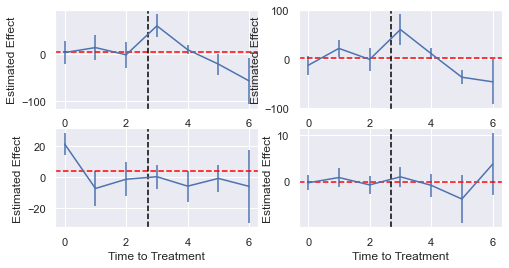

In [ ]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
#ax5 = fig.add_subplot(2, 3, 5)
#ax6 = fig.add_subplot(2, 3, 6)

for k in range(1,5):
    res = pd.concat([globals()['cluster_ols'+str(k)].params, globals()['cluster_ols'+str(k)].bse], axis = 1)
    res = res.rename(columns={1: 'std_error', 0: 'Beta'})
    res['ci'] = res['std_error']*1.96
    res = res.filter(like='A', axis=0)
    res.index=res.index.str.replace('A', '')
    res.index.astype('float').astype('int')
    
    res.plot(
        y='Beta',
        yerr='ci',
        xlabel='Time to Treatment',
        ylabel='Estimated Effect',
        legend=False, ax= globals()['ax' + str(k)]
    )
    mean= res['Beta'].iloc[0:3].mean()
    globals()['ax' + str(k)].axhline(mean, linestyle='dashed',color='red')
    globals()['ax' + str(k)].axvline(2.7, linestyle='dashed',color='black')

plt.show()